In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the Titanic dataset
data = pd.read_csv('Titanic-Dataset.csv')

# Explore the dataset (you can split this into multiple boxes)
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Handle missing values and categorical data (split this into multiple boxes)
data.dropna(subset=['Age', 'Embarked'], inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [5]:
# Split data into training and testing sets (split this into multiple boxes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Build and train the RandomForestClassifier model (split this into multiple boxes)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Make predictions and evaluate the model (split this into multiple boxes)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.7692307692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        80
           1       0.76      0.70      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



In [8]:
import matplotlib.pyplot as plt

Accuracy: 0.7692307692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        80
           1       0.76      0.70      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



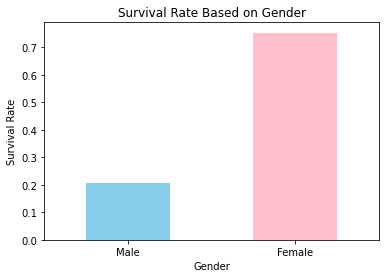

In [9]:
# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Visualize survival rate based on gender
survival_by_gender = data.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(6, 4))
survival_by_gender.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Survival Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

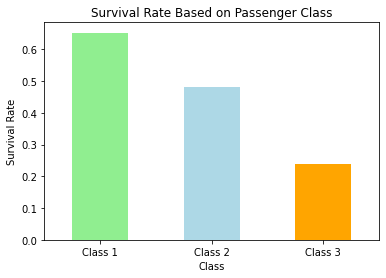

In [10]:
# Visualize survival rate based on passenger class
survival_by_class = data.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(6, 4))
survival_by_class.plot(kind='bar', color=['lightgreen', 'lightblue', 'orange'])
plt.title('Survival Rate Based on Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.show()

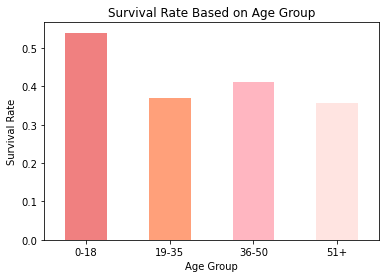

In [11]:
# Create age groups
age_bins = [0, 18, 35, 50, 100]
age_labels = ['0-18', '19-35', '36-50', '51+']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Visualize survival rate based on age group
survival_by_age = data.groupby('AgeGroup')['Survived'].mean()
plt.figure(figsize=(6, 4))
survival_by_age.plot(kind='bar', color=['lightcoral', 'lightsalmon', 'lightpink', 'mistyrose'])
plt.title('Survival Rate Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

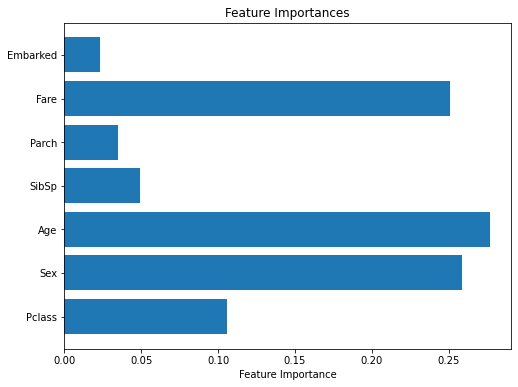

In [12]:
# Visualize feature importances
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

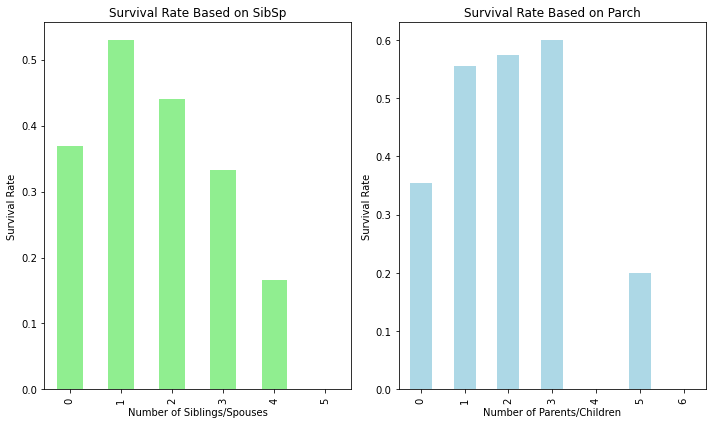

In [13]:
# Visualize survival rate based on SibSp and Parch
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
survival_by_sibsp = data.groupby('SibSp')['Survived'].mean()
survival_by_sibsp.plot(kind='bar', color='lightgreen')
plt.title('Survival Rate Based on SibSp')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')

plt.subplot(1, 2, 2)
survival_by_parch = data.groupby('Parch')['Survived'].mean()
survival_by_parch.plot(kind='bar', color='lightblue')
plt.title('Survival Rate Based on Parch')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

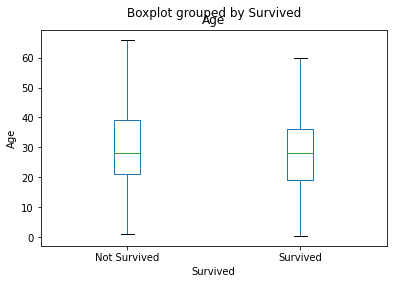

In [17]:
# Box plot of age distribution based on survival
plt.figure(figsize=(6, 4))
data.boxplot(column='Age', by='Survived', grid=False, showfliers=False)
#plt.title('Age Distribution Based on Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([1, 2], ['Not Survived', 'Survived'])
plt.show()

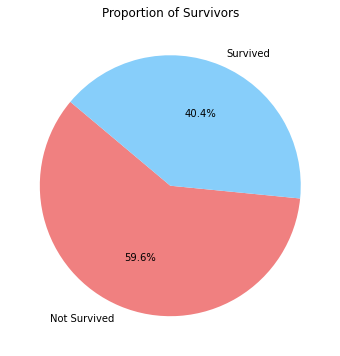

In [15]:
# Pie chart showing the proportion of survivors
survivor_counts = data['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(6, 6))
plt.pie(survivor_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Survivors')
plt.show()

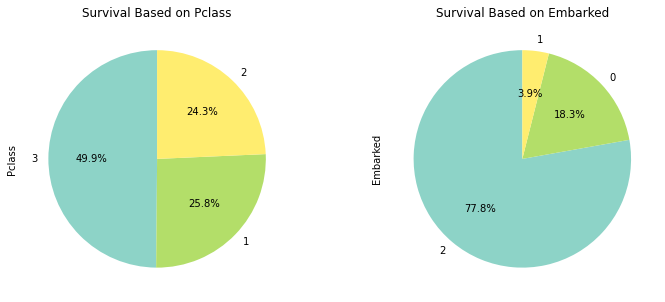

In [18]:
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame named data
# Pie chart for survival based on Pclass
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Survival Based on Pclass')

# Pie chart for survival based on Embarked
plt.subplot(1, 2, 2)
data['Embarked'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Survival Based on Embarked')
plt.show()

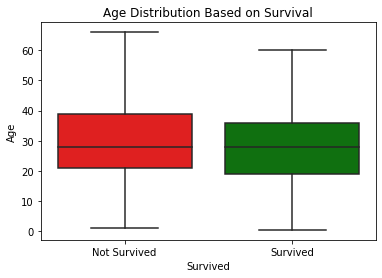

In [21]:
# Box plot of age distribution based on survival
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=data, showfliers=False, palette={0: 'red', 1: 'green'})
plt.title('Age Distribution Based on Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [24]:
import pandas as pd

# Load the Titanic dataset
data = pd.read_csv('Titanic-Dataset.csv')

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



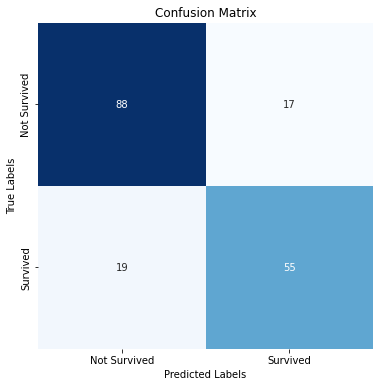

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

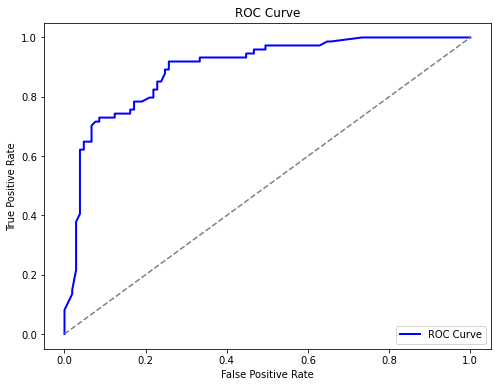

AUC-ROC Score: 0.90


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities of class 1 (survived)
probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, probs)
print(f'AUC-ROC Score: {auc_roc:.2f}')

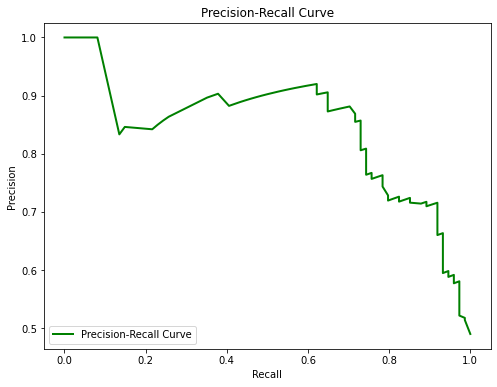

PR AUC Score: 0.84


In [28]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Calculate PR AUC score
pr_auc = auc(recall, precision)
print(f'PR AUC Score: {pr_auc:.2f}')

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the models with their respective hyperparameter grids
models = {
    'Decision Tree Classifier': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.1, 1, 10],
        'max_iter': [100, 200, 300]
    }),
    'Ada Boost Classifier': (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.1, 1, 10]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    })
}

# Train and evaluate models after hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_predictions = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, best_predictions)
    print(f'{model_name} Accuracy after Hyperparameter Tuning: {accuracy:.2f}')

Decision Tree Classifier Accuracy after Hyperparameter Tuning: 0.84


C:\Users\Venkat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy after Hyperparameter Tuning: 0.80
Ada Boost Classifier Accuracy after Hyperparameter Tuning: 0.80
Random Forest Accuracy after Hyperparameter Tuning: 0.82
KNN Accuracy after Hyperparameter Tuning: 0.74


C:\Users\Venkat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


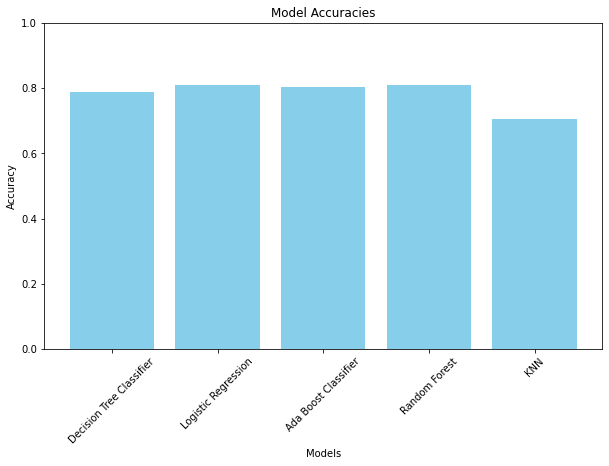


Model with Highest Accuracy: Logistic Regression (Accuracy: 0.81)


In [30]:
import matplotlib.pyplot as plt

# Define the models with their respective names
models = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Ada Boost Classifier': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
accuracies = []
model_names = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    model_names.append(model_name)

# Find the model with the highest accuracy
best_model_name = model_names[accuracies.index(max(accuracies))]

# Create a bar chart for model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy
plt.show()

# Print the model with the highest accuracy
print(f'\nModel with Highest Accuracy: {best_model_name} (Accuracy: {max(accuracies):.2f})')